In [1]:
! git clone https://github.com/Auquan/Tutorials.git

Cloning into 'Tutorials'...
remote: Enumerating objects: 353, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 353 (delta 23), reused 49 (delta 18), pack-reused 295
Receiving objects: 100% (353/353), 19.69 MiB | 2.07 MiB/s, done.
Resolving deltas: 100% (171/171), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import requests
import datetime as dt
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm

from matplotlib import rcParams
import cufflinks as cf

import plotly.express as px

In [3]:
def ZScore(data):
    return (data - data.mean())/data.std()

In [4]:
def dynamicZScore(data, short, long):
    short_mean_df = data.rolling(short).mean()
    long_mean_df = data.rolling(long).mean()
    long_std_df=data.rolling(long).std()
    return (short_mean_df - long_mean_df)/long_std_df

In [5]:
ticker_list = pd.read_html(
'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df_ticker = ticker_list[0]
df = df_ticker[df_ticker["GICS Sector"] == "Financials"]
df.head(50)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
11,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
21,ALL,Allstate,Financials,Property & Casualty Insurance,"Glenview, Illinois",1995-07-13,899051,1931
31,AXP,American Express,Financials,Consumer Finance,"New York City, New York",1976-06-30,4962,1850
32,AIG,American International Group,Financials,Property & Casualty Insurance,"New York City, New York",1980-03-31,5272,1919
35,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",2005-10-03,820027,1894
42,AON,Aon,Financials,Insurance Brokers,"London, UK",1996-04-23,315293,1982 (1919)
47,ACGL,Arch Capital Group,Financials,Reinsurance,"Hamilton, Bermuda",2022-11-01,947484,1995
49,AJG,Arthur J. Gallagher & Co.,Financials,Insurance Brokers,"Rolling Meadows, Illinois",2016-05-31,354190,1927
50,AIZ,Assurant,Financials,Multi-line Insurance,"New York City, New York",2007-04-10,1267238,1892
60,BAC,Bank of America,Financials,Diversified Banks,"Charlotte, North Carolina",1976-06-30,70858,1998 (1923 / 1874)


In [6]:
mask = np.logical_or(df["GICS Sub-Industry"] == 'Investment Banking & Brokerage', np.logical_or(df["GICS Sub-Industry"] =='Asset Management & Custody Banks', df["GICS Sub-Industry"] =='Diversified Banks'))
df.reset_index()
df = df[mask]

In [7]:
df.reset_index(drop = True, inplace = True)
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",2005-10-03,820027,1894
1,BAC,Bank of America,Financials,Diversified Banks,"Charlotte, North Carolina",1976-06-30,70858,1998 (1923 / 1874)
2,BLK,BlackRock,Financials,Asset Management & Custody Banks,"New York City, New York",2011-04-04,1364742,1988
3,BK,BNY Mellon,Financials,Asset Management & Custody Banks,"New York City, New York",1995-03-31,1390777,1784
4,SCHW,Charles Schwab Corporation,Financials,Investment Banking & Brokerage,"Westlake, Texas",1997-06-02,316709,1971
5,C,Citigroup,Financials,Diversified Banks,"New York City, New York",1988-05-31,831001,1998
6,CMA,Comerica,Financials,Diversified Banks,"Dallas, Texas",1995-12-01,28412,1849
7,BEN,Franklin Templeton,Financials,Asset Management & Custody Banks,"San Mateo, California",1998-04-30,38777,1947
8,GS,Goldman Sachs,Financials,Investment Banking & Brokerage,"New York City, New York",2002-07-22,886982,1869
9,IVZ,Invesco,Financials,Asset Management & Custody Banks,"Atlanta, Georgia",2008-08-21,914208,1935


In [8]:
tickers = df["Symbol"].tolist()

In [9]:
df_log = yf.download(tickers, start= "2018-01-01")["Close"].apply(lambda x: np.log(x))
df_actual =yf.download(tickers, start= "2010-06-01")["Close"]

[*********************100%***********************]  18 of 18 completed
[*********************100%***********************]  18 of 18 completed


In [10]:
df_actual

,AMP,BAC,BEN,BK,BLK,C,CMA,GS,IVZ,JPM,MS,NTRS,RJF,SCHW,STT,TROW,USB,WFC
Date,,,,,,,,,,,,,,,,,,
2010-06-01,38.790001,15.440000,31.830000,26.500000,163.199997,38.500000,37.259998,141.860001,18.139999,38.540001,26.129999,49.820000,18.286667,15.960000,37.020000,48.709999,23.290001,28.230000
2010-06-02,40.299999,15.890000,32.626667,27.290001,164.770004,39.200001,38.570000,144.830002,18.850000,39.549999,27.180000,51.110001,19.033333,16.450001,38.380001,50.090000,23.990000,29.180000
2010-06-03,40.240002,15.810000,31.956667,27.280001,163.839996,39.599998,37.990002,144.039993,18.719999,39.099998,26.850000,50.930000,18.953333,16.700001,38.910000,49.470001,23.570000,28.860001
2010-06-04,38.410000,15.350000,30.463333,26.000000,159.490005,37.900002,36.250000,142.250000,17.840000,37.619999,25.990000,49.020000,18.406668,16.309999,36.480000,47.919998,22.850000,27.780001
2010-06-07,37.529999,14.830000,29.549999,25.620001,157.500000,36.400002,35.939999,138.679993,17.129999,36.720001,25.290001,48.500000,18.166668,15.870000,36.279999,47.119999,22.459999,27.290001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-30,309.450012,28.260000,24.709999,40.689999,673.580017,44.700001,37.590000,330.829987,14.820000,137.460007,83.419998,73.180000,94.059998,53.840000,69.330002,108.730003,30.660000,40.980000
2023-05-31,298.470001,27.790001,24.010000,40.200001,657.549988,44.320000,36.099998,323.899994,14.380000,135.710007,81.760002,71.919998,90.349998,52.689999,68.019997,107.160004,29.900000,39.810001
2023-06-01,303.730011,27.780001,24.420000,41.250000,668.840027,44.840000,38.180000,316.399994,14.740000,137.580002,82.070000,73.040001,91.139999,52.700001,69.529999,108.379997,30.520000,40.060001


In [11]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            df = pd.concat([S1, S2], axis = 1).dropna(how = "any")
            result = coint(df[df.columns[0]], df[df.columns[1]])
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j], round(pvalue, 2)))
    return score_matrix, pvalue_matrix, pairs

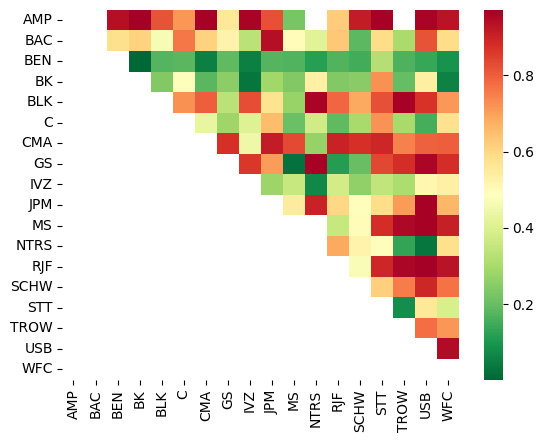

[('BEN', 'BK', 0.0), ('BEN', 'IVZ', 0.05), ('BK', 'IVZ', 0.03), ('GS', 'MS', 0.02), ('NTRS', 'USB', 0.03)]


In [12]:
scores, pvalues, pairs = find_cointegrated_pairs(df_log)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(
    pvalues,
    xticklabels=df_log.columns.tolist(), 
    yticklabels=df_log.columns.tolist(),
    cmap='RdYlGn_r',
    mask = (pvalues >= 0.98)
                )
plt.show()
print(pairs)

0.2242796085532317


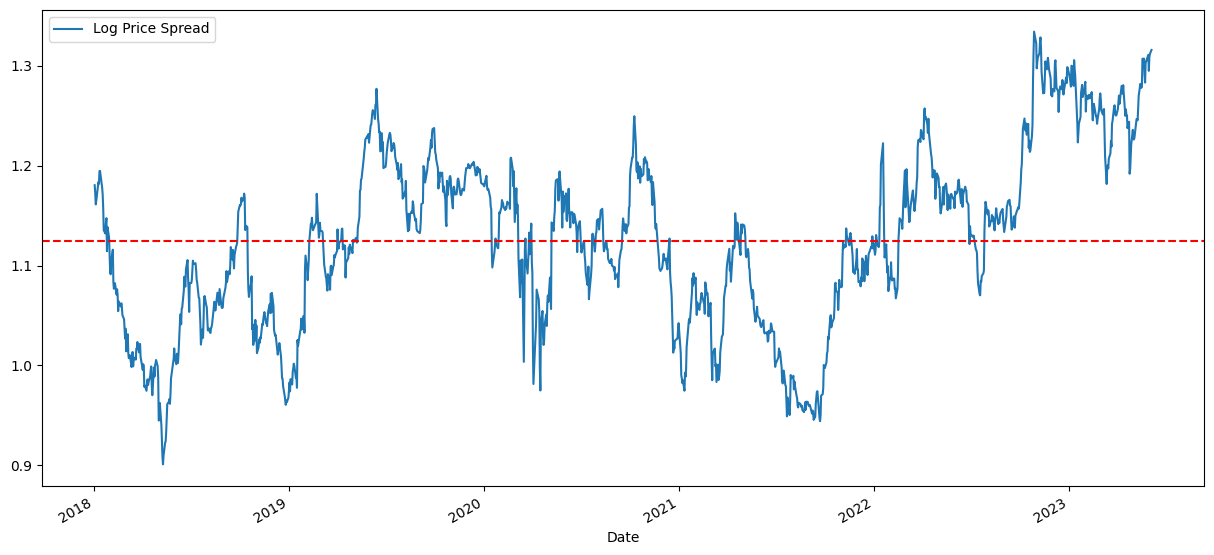

In [13]:
S1 = df_log['AMP']
S2 = df_log['MS']
df = pd.concat([S1, S2], axis = 1).dropna(how = "any")
score, pvalue, _ = coint(df[df.columns.tolist()[0]], df[df.columns.tolist()[1]])
print(pvalue)
ratios = S1 - S2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean(), color = "red", linestyle = "--")
plt.legend(['Log Price Spread'])
plt.show()

0.09410161894969521


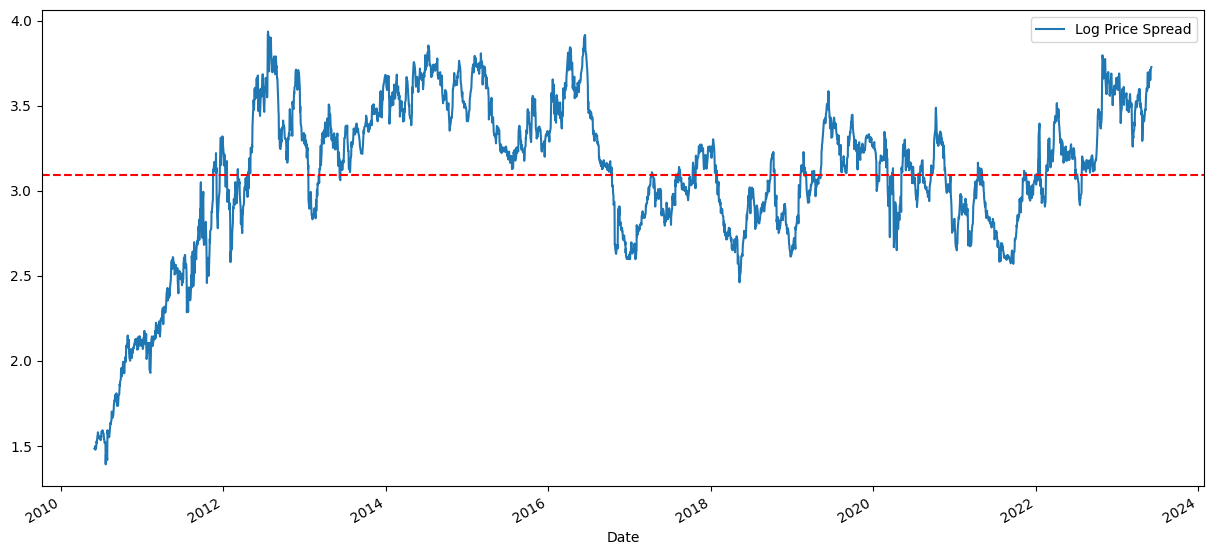

In [14]:
S1 = df_actual['AMP']
S2 = df_actual['MS']
df = pd.concat([S1, S2], axis = 1).dropna(how = "any")
score, pvalue, _ = coint(df[df.columns.tolist()[0]], df[df.columns.tolist()[1]])
print(pvalue)
ratios = S1/S2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean(), color = "red", linestyle = "--")
plt.legend(['Log Price Spread'])
plt.show()

In [15]:
splitting_year = 2018
train_df = df_actual[df_actual.index.year <= splitting_year]
test_df = df_actual[df_actual.index.year > splitting_year]
ratios_train = train_df.loc[: , "AMP"]/train_df.loc[: ,"MS"]
ratios_test = test_df.loc[: , "AMP"]/test_df.loc[: ,"MS"]
ratios_train

Date
2010-06-01    1.484501
2010-06-02    1.482708
2010-06-03    1.498697
2010-06-04    1.477876
2010-06-07    1.483986
                ...   
2018-12-24    2.636585
2018-12-26    2.613232
2018-12-27    2.624307
2018-12-28    2.620015
2018-12-31    2.632282
Length: 2162, dtype: float64

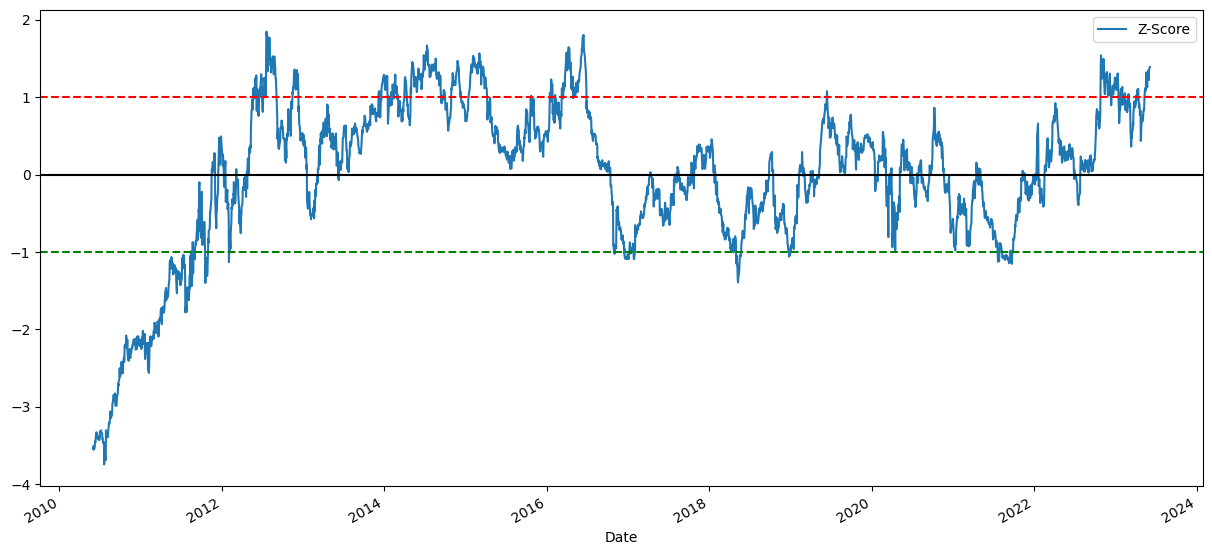

In [16]:
df_Z = ZScore(ratios)
df_Z.plot(figsize=(15,7))
plt.axhline(-1, color = "green", linestyle = "--")
plt.axhline(0, color = "black", linestyle = "-")
plt.axhline(1, color = "red", linestyle = "--")
plt.legend(['Z-Score'])
plt.show()

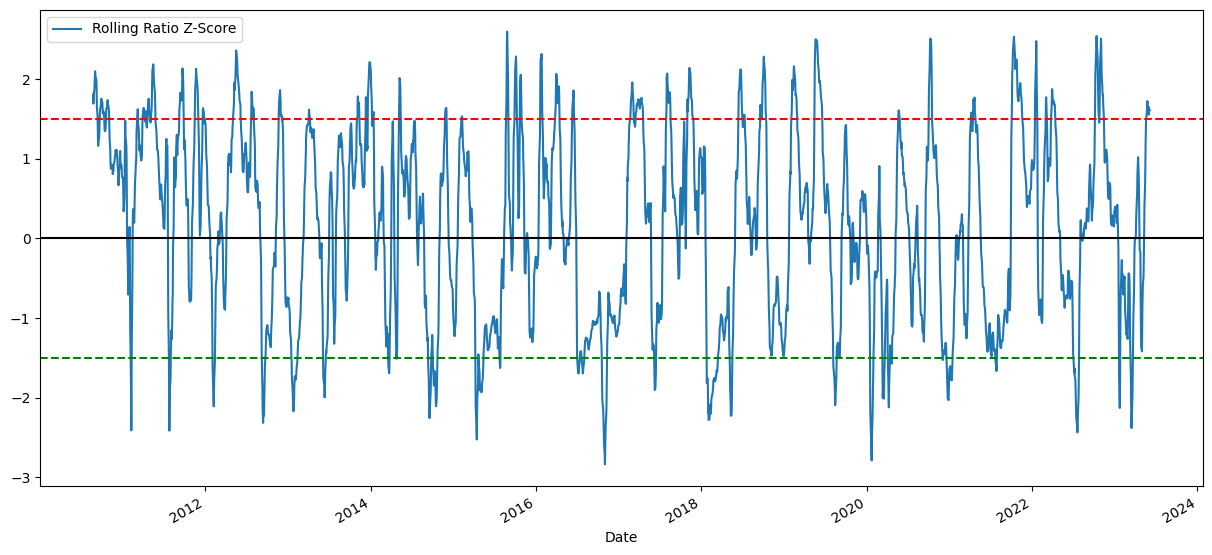

In [17]:
df_dynamic_Z = dynamicZScore(ratios, 5, 60)
df_dynamic_Z.plot(figsize=(15,7))
plt.axhline(-1.5, color = "green", linestyle = "--")
plt.axhline(0, color = "black", linestyle = "-")
plt.axhline(1.5, color = "red", linestyle = "--")
plt.legend(['Rolling Ratio Z-Score'])

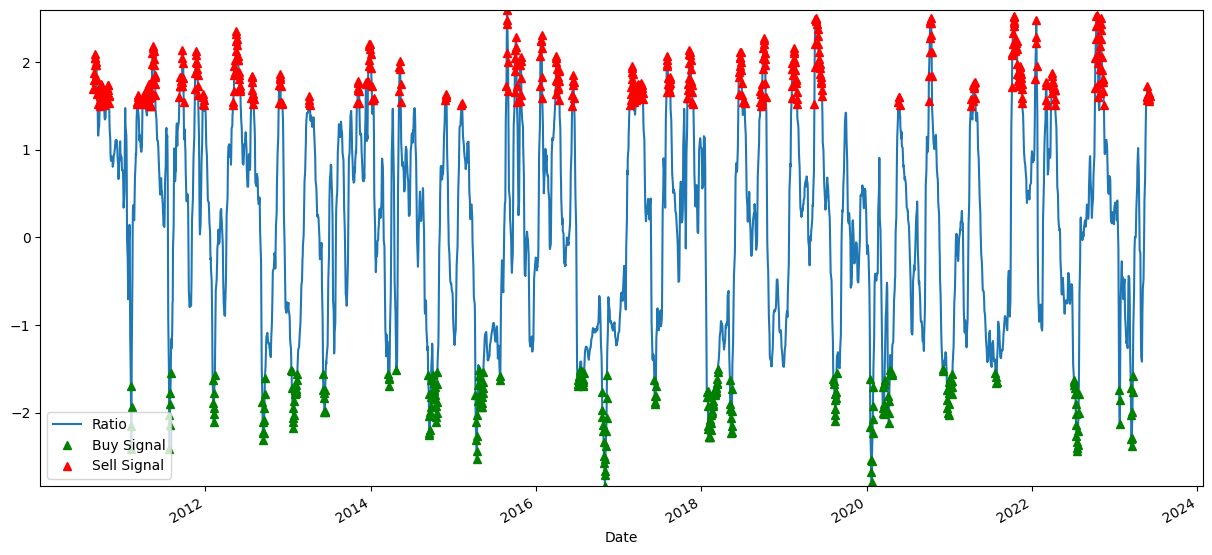

In [18]:
plt.figure(figsize=(15,7))

df_dynamic_Z.plot()
buy = df_dynamic_Z.copy()
sell = df_dynamic_Z.copy()
buy[df_dynamic_Z>-1.5] = -100
sell[df_dynamic_Z<1.5] = -100
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,df_dynamic_Z.min(),df_dynamic_Z.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

In [19]:
print(ratios)
print(df_dynamic_Z.fillna(value = 0))
buy = ratios.copy()
sell = ratios.copy()



Date
2010-06-01    1.484501
2010-06-02    1.482708
2010-06-03    1.498697
2010-06-04    1.477876
2010-06-07    1.483986
                ...   
2023-05-30    3.709542
2023-05-31    3.650563
2023-06-01    3.700865
2023-06-02    3.713100
2023-06-05    3.727690
Length: 3276, dtype: float64
Date
2010-06-01    0.000000
2010-06-02    0.000000
2010-06-03    0.000000
2010-06-04    0.000000
2010-06-07    0.000000
                ...   
2023-05-30    1.575047
2023-05-31    1.552465
2023-06-01    1.644363
2023-06-02    1.620804
2023-06-05    1.608311
Length: 3276, dtype: float64


[*********************100%***********************]  18 of 18 completed


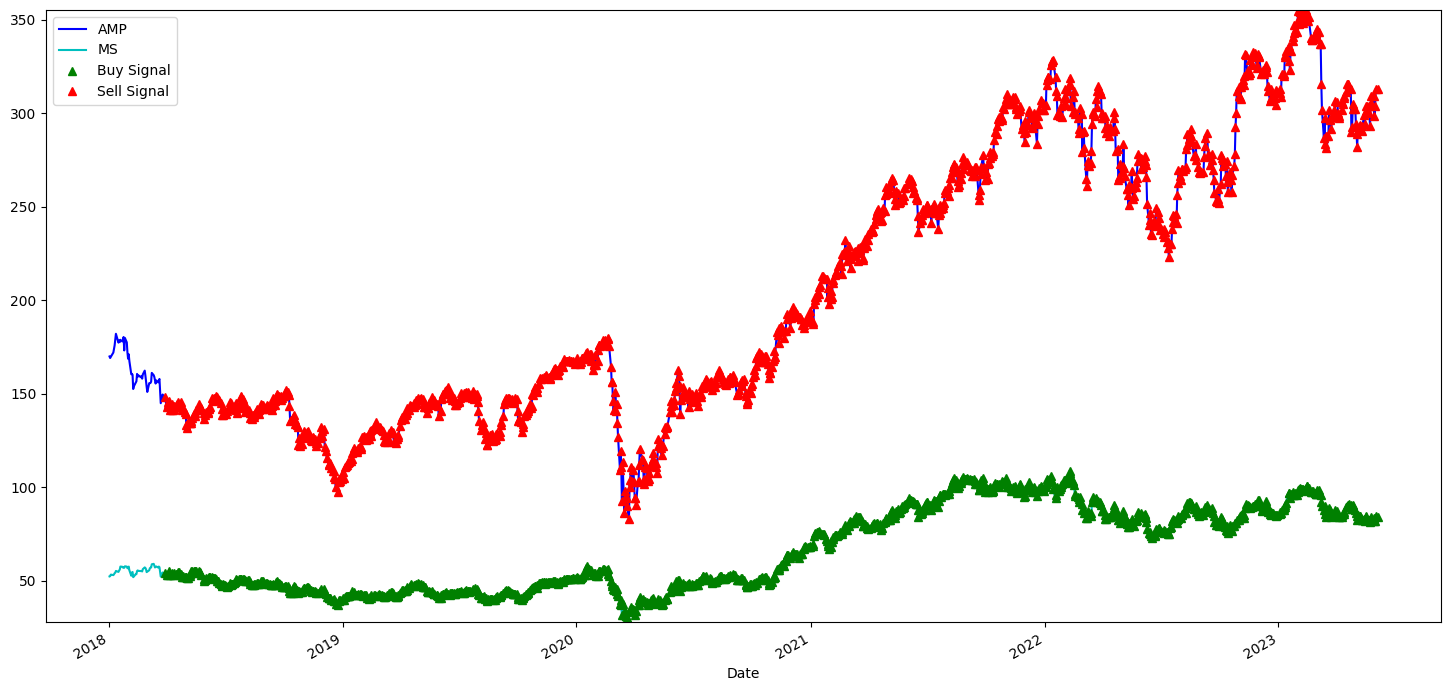

In [25]:
plt.figure(figsize=(18,9))
df_actual =yf.download(tickers, start= "2018-01-01")["Close"]
S1 = df_actual.loc[:, 'AMP']
S2 = df_actual.loc[:, 'MS']

S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=-100] = S1[buy!=-100]
sellR[buy!=-100] = S2[buy!=-100]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=-100] = S2[sell!=-100]
sellR[sell!=-100] = S1[sell!=-100]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))

plt.legend(['AMP','MS', 'Buy Signal', 'Sell Signal'])
plt.show()

Backtesting

In [21]:
def trade(S1, S2, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    PnL = []
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        PnL.append(money)
        # Sell short if the z-score is > 1
        if zscore[i] > 1.5:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1.5:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] + S2[i] * countS2
            countS1 = 0
            countS2 = 0
#         print('Z-score: '+ str(zscore[i]), countS1, countS2, S1[i] , S2[i])
    return money, PnL


In [22]:
trade(train_df.loc[:, 'AMP'], train_df.loc[:, 'MS'], 5, 90)[1]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.105427357601002e-15,
 7.105427357601002e-15,
 7.105427357601002e-15,
 7.105427357601002e-15,
 0.0,
 0.0,
 0.0,
 -7.105427357601002e-15,
 0.0,
 -7.105427357601002e-15,
 -7.105427357601002e-15,
 -7.105427357601002e-15,
 -7.105427357601002e-15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -10.542848882693761,
 

Avoiding overfitting

In [26]:
# Find the window length 0-254 
# that gives the highest returns using this strategy
train_scores = []
windows = []
for long in range(255):
        total = trade(train_df.loc[:, 'AMP'], train_df.loc[:, 'MS'], 5, long)
        print(total)
        train_scores.append(total[0])
        windows.append(long)
best_length_train = np.argmax(train_scores)
print(f"Best Profits:", train_scores[best_length_train])
print(f"Best Window:", windows[best_length_train])


0


TypeError: 'int' object is not subscriptable

In [27]:
test_scores = []
windows = []
for long in range(255):
        test_scores.append(trade(test_df.loc[:, 'AMP'], test_df.loc[:, 'MS'], 5, long)[0])
        windows.append(long)
best_length_test = np.argmax(test_scores)
print(f"Best Profits:", test_scores[best_length_test])
print(f"Best Window:", windows[best_length_test])
print(len(test_scores))

TypeError: 'int' object is not subscriptable

NameError: name 'best_length_train' is not defined

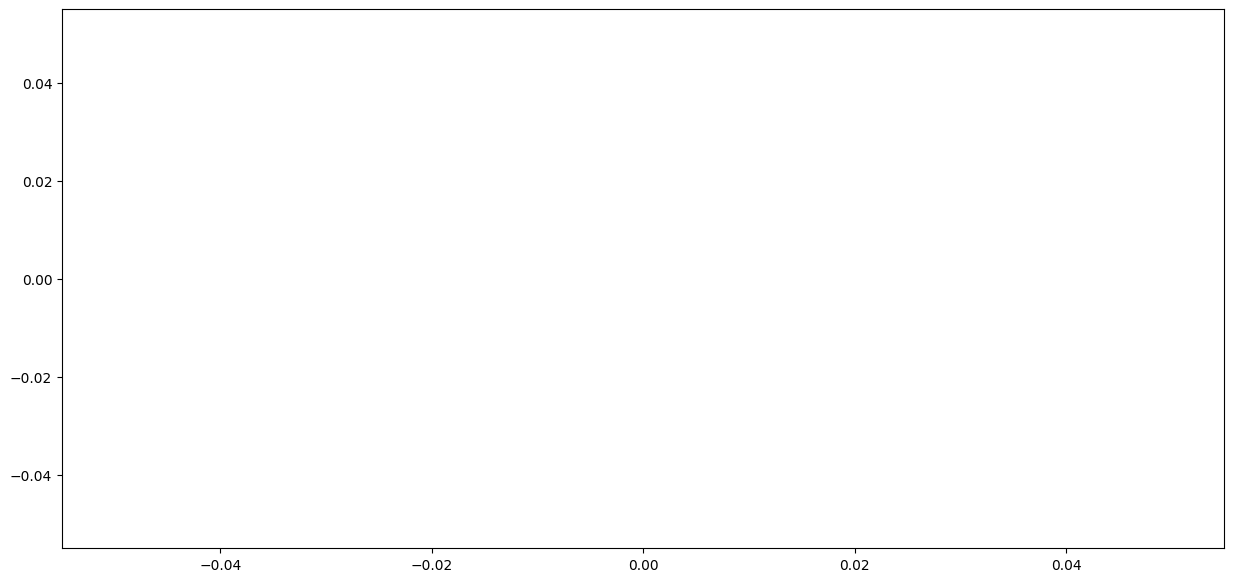

In [28]:
plt.figure(figsize=(15,7))
plt.plot(train_scores)
plt.plot(test_scores)
plt.plot([windows[best_length_train]], [train_scores[best_length_train]], 'v', color='red', ms=10)
plt.plot([windows[best_length_test]], [test_scores[best_length_test]], 'v', color='red', ms=10)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()

In [ ]:
df_cumulative_pnl = pd.DataFrame(trade(test_df.loc[:, 'AMP'], test_df.loc[:, 'MS'], 5, 249)[1])

In [ ]:
df_cumulative_pnl.plot()